

# ***Modulo 2***
Sebastián Burgos Alanís A01746459

CNN con Keras, modelo predictivo para tumores cerebrales

[Kaggle DB](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

El Colab está dividido en 6 secciones:

***Procesamiento del DataSet***
  - Se procesa el dataset, se modifican las terminaciones de las imagenes y se establece un tamaño 128,128 y 3 colores RGB

**Construccion del Modelo**
 - Se entrena el modelo y se aplican parametros como binary_crosetopy
 - Se muestra matriz de confusion y gráfica de pérdida

***Revision del Modelo***
 - Se corre una muestra individual para tumor 0 y 1

***Resultados del Problema***
 - Se muestran los resultados del primer modelo

***Cambios Realizados***
 - Se indican los cambios realizados para ajustar el modelo previo.

***Posibles Mejoras***
 - Se realizan cambios en el modelo como:
  * modificación de prámetros.
  * resultados nuevos.

# ***Procesamiento DB***

In [1]:
import os
import keras
import numpy as np
import pandas as pd
from google.colab import drive
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score


In [2]:
drive.mount("/content/gdrive")
!pwd
%cd "/content/gdrive/MyDrive/ENTREGABLE_CNN/brain_tumor_dataset"
!ls

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/ENTREGABLE_CNN/brain_tumor_dataset
brain_tumor_dataset  no  yes


In [4]:
label_encoder = LabelEncoder()
label_encoder.fit([0, 1])

encoder = OneHotEncoder(sparse=False)
encoder.fit(label_encoder.transform([0, 1]).reshape(-1, 1))

data = []
result = []

# Procesamiento de imágenes y su label encode a tumores (0) y no tumores (1)

def Imagenes_procesamiento(image_folder, label):
    paths = []
    for filename in os.listdir(image_folder):
        if filename.lower().endswith((".jpg", ".jpeg")):
            new_filename = os.path.splitext(filename)[0] + ".jpg"
            new_path = os.path.join(image_folder, new_filename)
            os.rename(os.path.join(image_folder, filename), new_path)
            paths.append(new_path)

    # Procesar todas las imágenes y estadnarizar el tamaño
    # Hacer un arreglo Numpy con las imagenes y crear un label_encoder
    for path in paths:
        img = Image.open(path)
        img = img.resize((128, 128))
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(np.array(img))
            label_encoded = label_encoder.transform([label]).reshape(-1, 1)
            one_hot_label = encoder.transform(label_encoded)
            result.append(one_hot_label[0])

Imagenes_yes = "/content/gdrive/MyDrive/ENTREGABLE_CNN/brain_tumor_dataset/yes"
Imagenes_no = "/content/gdrive/MyDrive/ENTREGABLE_CNN/brain_tumor_dataset/no"

# Prcesamiento de Imágenes para tumores y noTumores
Imagenes_procesamiento(Imagenes_yes, label=0)
Imagenes_procesamiento(Imagenes_no, label=1)

data = np.array(data)
result = np.array(result)

print("Data Shape:", data.shape, "Result Shape", result.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Data Shape: (216, 128, 128, 3) Result Shape (216, 2)


In [17]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=42)

# **Cambios de parámetros y posibles mejoras**

Accuracy: 79%

In [61]:
from keras.optimizers import Adam

# Further reduce model complexity
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 127008)            0         
                                                                 
 dense_20 (Dense)            (None, 128)               16257152  
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 2)                 258       
                                                      

In [62]:
y_train.shape

(172, 2)

In [63]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=30, batch_size=20,
                    verbose=1, validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/30
9/9 [==============================] - 1s 50ms/step - loss: 425.3557 - accuracy: 0.5698 - val_loss: 130.7593 - val_accuracy: 0.7045
Epoch 2/30
9/9 [==============================] - 0s 26ms/step - loss: 130.3850 - accuracy: 0.6744 - val_loss: 98.3455 - val_accuracy: 0.7045
Epoch 3/30
9/9 [==============================] - 0s 26ms/step - loss: 38.1794 - accuracy: 0.8140 - val_loss: 22.6049 - val_accuracy: 0.7045
Epoch 4/30
9/9 [==============================] - 0s 25ms/step - loss: 11.5760 - accuracy: 0.8023 - val_loss: 9.0005 - val_accuracy: 0.7273
Epoch 5/30
9/9 [==============================] - 0s 26ms/step - loss: 2.0680 - accuracy: 0.8023 - val_loss: 4.6121 - val_accuracy: 0.7045
Epoch 6/30
9/9 [==============================] - 0s 24ms/step - loss: 0.6405 - accuracy: 0.8256 - val_loss: 3.9116 - val_accuracy: 0.6818
Epoch 7/30
9/9 [==============================] - 0s 17ms/step - loss: 0.4494 - accuracy: 0.8314 - val_loss: 3.9955 - val_accuracy: 0.7045
Epoch 8/30
9/9 [=

# Predicción del Modelo

In [64]:
y_pred = model.predict(x_test)

y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))


2/2 [==============================] - 0s 7ms/step
Accuracy: 70.45%


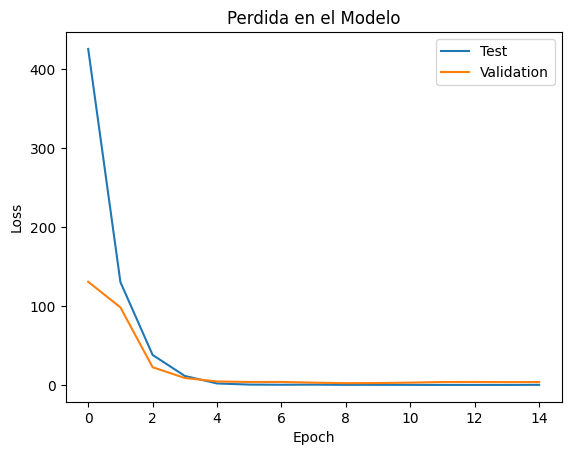

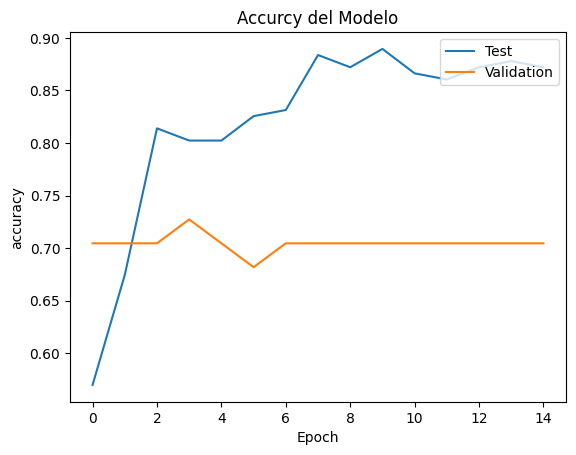

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdida en el Modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accurcy del Modelo')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

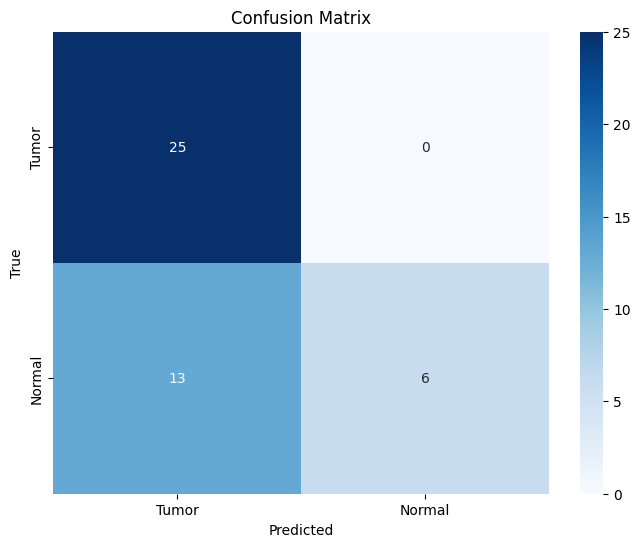

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_true_labels, y_pred_labels)

class_labels = ["Tumor", "Normal"]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Función de Prueba

In [72]:
from keras.preprocessing import image
import numpy as np

def load_and_predict(model, image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    prediction = model.predict(img_array)

    predicted_class = np.argmax(prediction)

    if predicted_class == 0:
        print("Prediction: No Tumor")
    else:
        print("Prediction: Tumor")

#Direccion de imagen de prueba
load_and_predict(model, "/content/gdrive/MyDrive/ENTREGABLE_CNN/brain_tumor_dataset/brain_tumor_dataset/no/3 no.jpg")


1/1 [==============================] - 0s 17ms/step
Prediction: No Tumor
